# Data Structures and Processing

## Week 10: Time Series

### Remarks:

1. Install the libraries listed below using your package manager.  An example of installing the library `numpy` is to issue a the following command on a terminal (in Ubuntu) `python3 -m pip install numpy`.

2. Make sure that you are following the conventions.  For examples, `import numpy as np`, which imports `numpy` packages and sets the abbreviation for it.

3. Do not import the packages without the short names, unless it is intentional.  Doing so might lead to a namespace conflict, or unintended uses of functions coming from two libraries as a part of different implementations.

4. We are assigning `None` to variables and use `pass` in the body of the functions, where we expect a solution from you.  Please replace these values and statements with your solution.

The exercises in this notebook are aligned with the material provided for the lecture.

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dtime
import matplotlib.pyplot as plt

## Task 1

Consider a file `IBM.csv` attached to this notebook, which contains stocks since 2000 of IBM.  Import the data from the file as a pandas `DataFrame` into a variable `ts1`.  Since there is no mentioning of index, therefore, the default integer incremented index is associated.  Notice that one of the column is named `"Date"`.  We would like to use this as an index for `df1`.

Your task is to use pandas builtin function to change the index of the above `DataFrame` named `df1`.

In [2]:
# Import the data from IBM.csv as a DataFrame
ts1 = pd.read_csv("IBM.csv")

# Set the index to "Date" column
ts1['Date'] = pd.to_datetime(ts1['Date'])

# Set the "Date" column as the index
ts1.set_index('Date', inplace=True)

## Task 2

Reconsider the `DataFrame` named `df1` from Task 1 above.

Your task is to write down a function `average_until_months_end` that takes three arguments:

1. `df` a pandas `DataFrame` (for example, `df1`, as defined above)
2. `ts` a string containing a timestamp.
3. `col` as a column name.

and it returns the mean value along the column `col` with the range of time starting from the timestamp `ts` until the end of the month.


In [3]:
def average_until_months_end(df, ts, col):
    # Convert to datetime
    ts = pd.to_datetime(ts)
    
    # Calculate the end of the month
    month_end = ts + pd.tseries.offsets.MonthEnd(1)
    
    # Filter the DataFrame and calc mean
    average = df.loc[ts:month_end, col].mean()
    
    return average


## Task 3

Write down a function `change_in_month` that takes three arguments:

1. `df`, the `DataFrame`,
2. `"col"`, the column name for consideration,
3. `"date"`, date as a string of the form "YYYY-mm-dd" or "YYYY/mm/dd".

that returns the difference of the values at the beginning and at the end of a particular month.

In [4]:
def change_in_month(df, col, date):
    date = pd.to_datetime(date)
    
    # Get the first and last day of the month
    month_start = date.replace(day=1)
    month_end = (month_start + pd.tseries.offsets.MonthEnd(1)).date()
    
    # Get the value at the start and end of the month
    start_value = df.loc[month_start, col]
    end_value = df.loc[month_end, col]
    
    # Calculate
    difference = end_value - start_value
    
    return difference


## Task 4

The file `IBM.csv` has down-sampled data in it, where each record has a daily report of the `open`, `high`, `low` and `close` and other entries.

Your task is to down-sample the column `"Open"` to yearly periods reporting its `ohlc`.  Finally, plot the values for `open` and `close`.

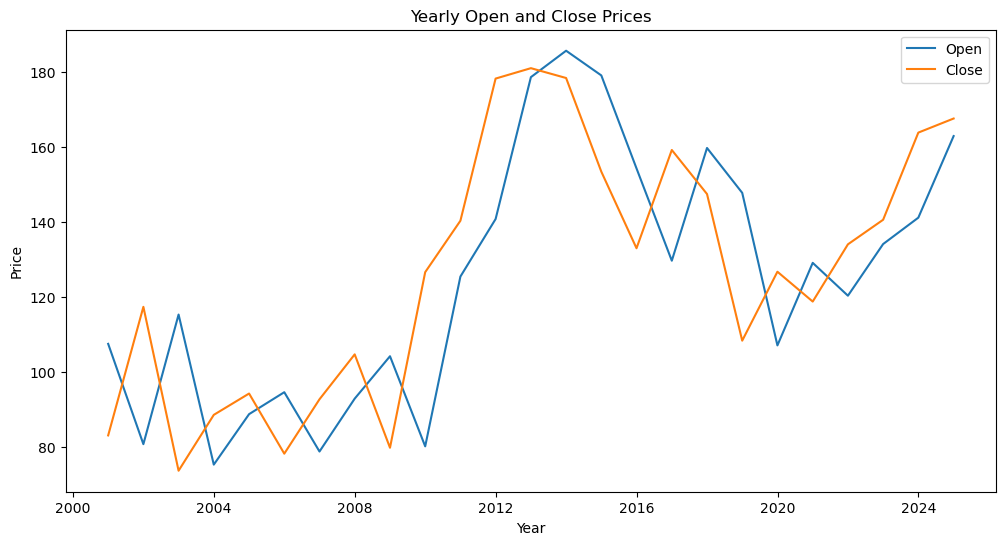

In [5]:
df_yearly = ts1.resample('Y').ohlc()

# Plot the open and close prices
plt.figure(figsize=(12,6))
plt.plot(df_yearly.index, df_yearly['Open']['open'], label='Open')
plt.plot(df_yearly.index, df_yearly['Open']['close'], label='Close')
plt.title('Yearly Open and Close Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Task 5

Reconsider the `IBM.csv` file containing the IBM stocks values/day.  Consider a window of 1000 days and plot mean values.

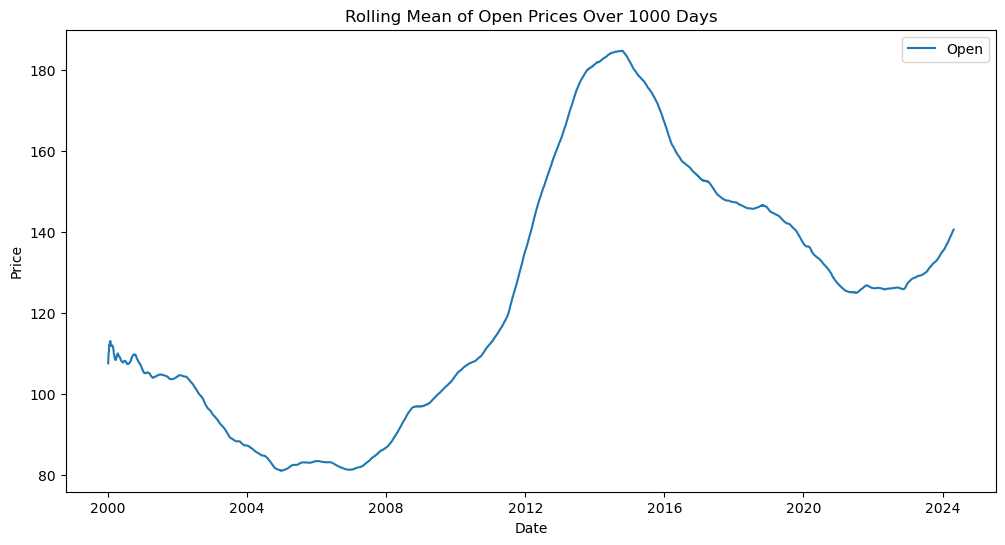

In [6]:
# Using rolling function
rolling = ts1.rolling(window='1000D')

# Calculate the mean
mean_values = rolling.mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(mean_values.index, mean_values['Open'], label='Open')
plt.title('Rolling Mean of Open Prices Over 1000 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Task 6

Reconsider the `IBM.csv` file containing the IBM stocks.  Consider a smoothing factor `alpha=0.01`, and plot the `ewm` average for the column `"Open"`, and the actual values in that column.

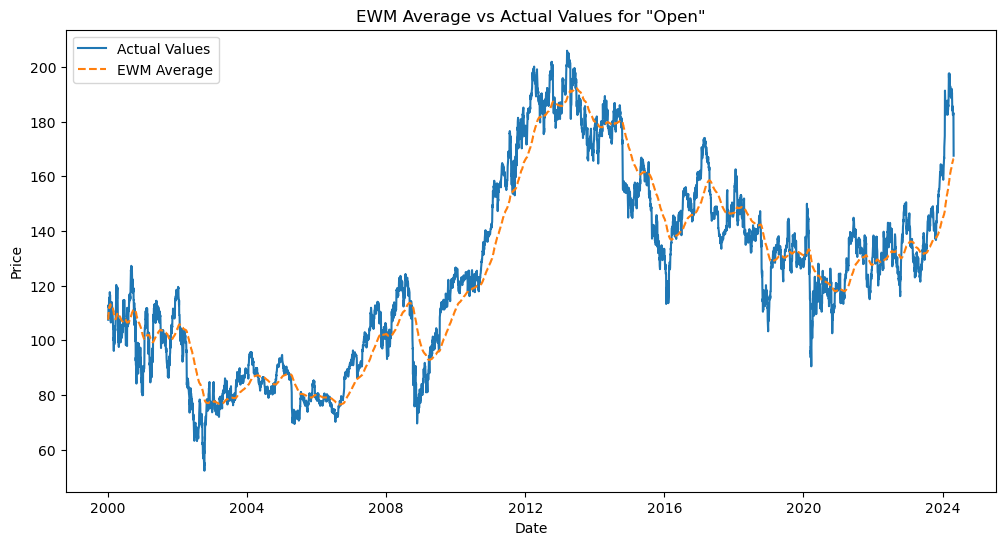

In [7]:
# Calculate the ewm average with alpha=0.01
ewm_average = ts1['Open'].ewm(alpha=0.01).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(ts1.index, ts1['Open'], label='Actual Values')
plt.plot(ewm_average.index, ewm_average, label='EWM Average', linestyle='--')
plt.title('EWM Average vs Actual Values for "Open"')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()